Instalasi library yang dibutuhkan

In [3]:
pip install tensorflow numpy pandas matplotlib

Mengimpor library yang tadi sudah diunduh

In [4]:
import os
import random
import numpy as np
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from google.colab import drive

Menghubungkan colab dengan google drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


Mendefinisikan direktori yang akan digunakan

In [7]:
data_dir = '/content/drive/My Drive/pm'
output_dir = '/content/drive/My Drive/dataset_split'
os.makedirs(output_dir, exist_ok=True)

Splitting dataset

In [9]:
categories = ['karsen', 'kelor']
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for category in categories:
    path = os.path.join(data_dir, category)
    images = os.listdir(path)
    random.shuffle(images)

    train, val_test = train_test_split(images, test_size=0.4, random_state=42)
    val, test = train_test_split(val_test, test_size=0.5, random_state=42)

    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    for img in train:
        shutil.copy(os.path.join(path, img), os.path.join(train_dir, category, img))
    for img in val:
        shutil.copy(os.path.join(path, img), os.path.join(val_dir, category, img))
    for img in test:
        shutil.copy(os.path.join(path, img), os.path.join(test_dir, category, img))

# Validate total number of images is 1000
total_images = sum(len(os.listdir(os.path.join(data_dir, category))) for category in categories)
assert total_images == 1000, f"Dataset must contain exactly 1000 images, but found {total_images}."
print(f"Total images in the dataset: {total_images}")


Total images in the dataset: 1000


Melakukan augmentasi pada dataset

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


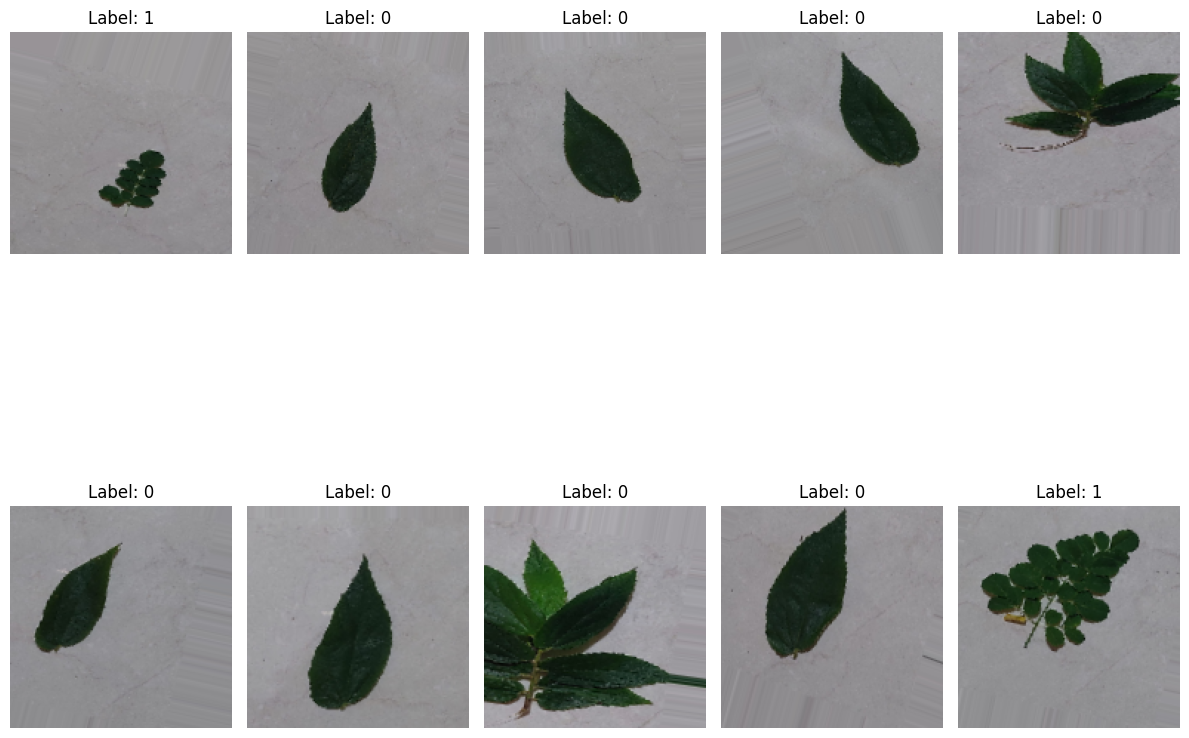

In [10]:
data_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = data_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


# Mendapatkan batch pertama dari train_generator
images, labels = next(train_generator)

# Menampilkan 10 gambar
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Membuat model

In [11]:
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Melatih model

In [12]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.4673 - loss: 0.8533 - val_accuracy: 0.5000 - val_loss: 0.7407
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.6481 - loss: 0.6290 - val_accuracy: 0.8650 - val_loss: 0.3908
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8213 - loss: 0.4425 - val_accuracy: 0.8800 - val_loss: 0.2945
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.8714 - loss: 0.3190 - val_accuracy: 0.8900 - val_loss: 0.3161
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8477 - loss: 0.3770 - val_accuracy: 0.9050 - val_loss: 0.2208
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8861 - loss: 0.2750 - val_accuracy: 0.9450 - val_loss: 0.2109
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.9236 - loss: 0.2257 - val_accuracy: 0.9400 - val_loss: 0.1873
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9330 - loss: 0.1904 - val_accuracy: 0.9750 - val_loss: 0.0946
Epo

Evaluasi model

In [15]:
test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

eval_result = model.evaluate(test_generator)
print(f"Test Loss: {eval_result[0]} | Test Accuracy: {eval_result[1]}")
val_accuracy = history.history['val_accuracy'][-1]
print(f"Validation Accuracy: {val_accuracy}")


Found 200 images belonging to 2 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9665 - loss: 0.0724
Test Loss: 0.06375408917665482 | Test Accuracy: 0.9800000190734863
Validation Accuracy: 0.9750000238418579


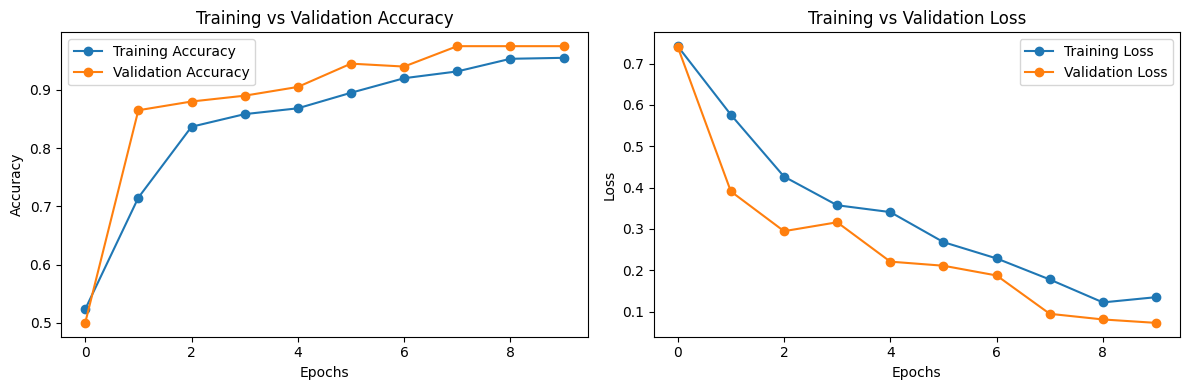

In [13]:
import matplotlib.pyplot as plt

# Pastikan 'history' adalah output dari model.fit()
# Misalnya: history = model.fit(train_generator, validation_data=val_generator, epochs=10)

plt.figure(figsize=(12, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.tight_layout()
plt.show()


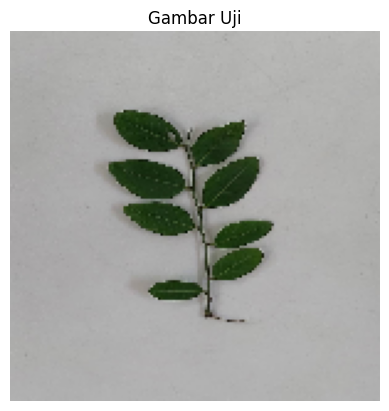

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Gambar ini diprediksi sebagai: Kelor


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk memuat dan memproses gambar
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize gambar
    img_array = image.img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    return img, img_array

# Path gambar uji (ganti dengan path gambar uji Anda)
img_path = '/content/drive/My Drive/pm/kelor/kelor1.jpg'  # Ganti dengan path gambar uji yang sesuai

# Muat gambar dan prediksi
img, img_array = preprocess_image(img_path)

# Menampilkan gambar uji
plt.imshow(img)
plt.title("Gambar Uji")
plt.axis('off')  # Matikan axis
plt.show()

# Prediksi menggunakan model
prediction = model.predict(img_array)

# Tampilkan hasil prediksi
predicted_class = 'Kelor' if prediction[0][0] > 0.5 else 'Kersen'
print(f"Gambar ini diprediksi sebagai: {predicted_class}")
